<a href="https://colab.research.google.com/github/Kavindu-D/Census_Income/blob/main/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary Libraries

In [23]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Reading the dataset from the google drive

In [24]:
drive.mount('/content/drive')
data = pd.read_excel('/content/drive/MyDrive/ML_CW/preprocessed_dataset.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Splitting training and test data

In [25]:
# Separating the target variable and features
target = data['income']
features = data.drop('income', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Training Random Forest Classifier model

In [26]:
# Training the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Testing the model
rf_predicts = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predicts)

print(rf_accuracy)

0.8708477098978418


In [27]:
# classification report for Random Forest
print(classification_report(y_test, rf_predicts))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87      7393
           1       0.85      0.90      0.87      7388

    accuracy                           0.87     14781
   macro avg       0.87      0.87      0.87     14781
weighted avg       0.87      0.87      0.87     14781



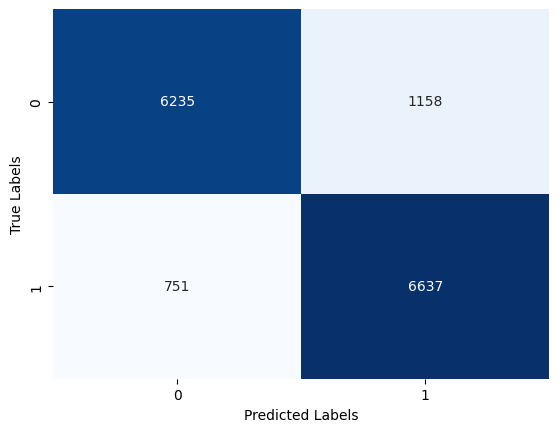

In [28]:
# Plotting the Confusion Matrix
conf_mat = confusion_matrix(y_test, rf_predicts)

sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Training Naive Bays model

In [29]:
# Training the model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Testing the model
nb_predicts = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predicts)

print(nb_accuracy)

0.7024558554901563


In [30]:
# classification report for Naive Bayes
print(classification_report(y_test, nb_predicts))

              precision    recall  f1-score   support

           0       0.64      0.93      0.76      7393
           1       0.87      0.48      0.62      7388

    accuracy                           0.70     14781
   macro avg       0.75      0.70      0.69     14781
weighted avg       0.75      0.70      0.69     14781



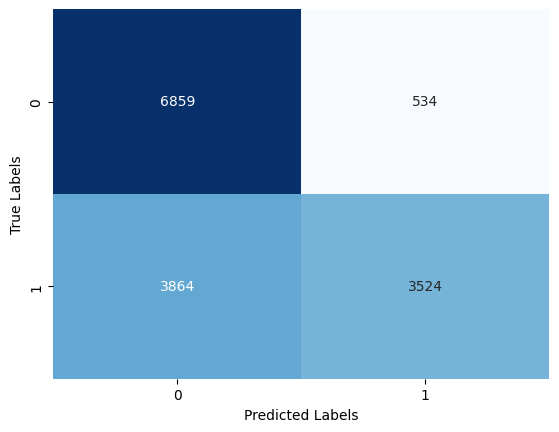

In [31]:
# Plotting the Confusion Matrix
conf_mat = confusion_matrix(y_test, nb_predicts)

sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()